## expt_group1.ipynb
### WESmith 05/08/20

In [3]:
import phial.experiment as ws
import phial.toolbox  as tb
import phial.node_functions as nf
from phial.experiment import Experiment

# ----------------------------------------------------------------------------------------------

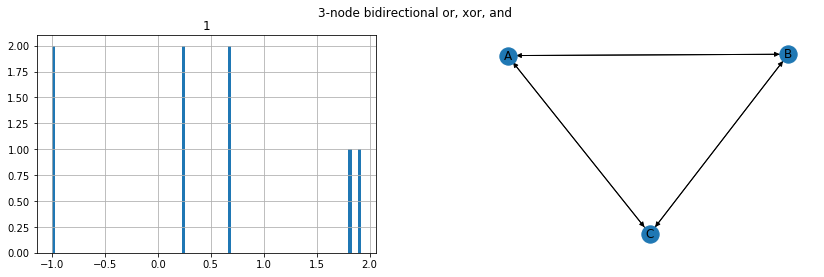

In [5]:
exp1 = Experiment(
    [('A', 'B'), ('A', 'C'), 
     ('B', 'A'), ('B', 'C'), 
     ('C', 'A'), ('C', 'B')],
    funcs=dict(A=nf.or_func, B=nf.and_func, C=nf.xor_func),
    title='3-node bidirectional or, xor, and',  # used in Mayner 2018 paper
)
exp1.run(countUnreachable=True)

In [6]:
exp1.info()

{'timestamp': '2020-05-09 11:58:13.728662',
 'duration': 1.6580327810370363,
 'results': {'111': 0.666668,
  '000': 0.666668,
  '100': 1.916665,
  '110': 0.25,
  '101': 1.816667,
  '001': 0.25,
  '010': -1,
  '011': -1},
 'filename': None}

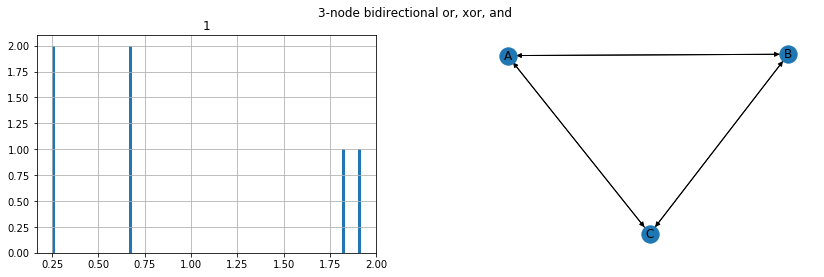

In [7]:
exp1.run(countUnreachable=False)

In [8]:
exp1.info()

{'timestamp': '2020-05-09 11:58:44.992810',
 'duration': 2.057242289010901,
 'results': {'111': 0.666668,
  '000': 0.666668,
  '100': 1.916665,
  '110': 0.25,
  '101': 1.816667,
  '001': 0.25},
 'filename': None}

# ----------------------------------------------------------------------------------------------

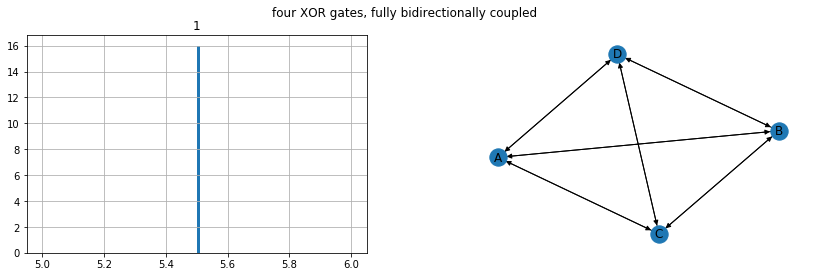

In [9]:
exp2 = Experiment(
         [('A', 'B'), ('A', 'C'), ('A', 'D'),
          ('B', 'A'), ('B', 'C'), ('B', 'D'),
          ('C', 'A'), ('C', 'B'), ('C', 'D'),
          ('D', 'A'), ('D', 'B'), ('D', 'C')],
         funcs=dict(A=tb.xor_func, B=tb.xor_func, C=tb.xor_func, D=tb.xor_func),
         title = 'four XOR gates, fully bidirectionally coupled')
exp2.run(countUnreachable=True)

In [10]:
exp2.info()

{'timestamp': '2020-05-09 11:59:26.620078',
 'duration': 9.301254981022794,
 'results': {'0101': 5.5,
  '1100': 5.5,
  '0011': 5.5,
  '1001': 5.5,
  '1101': 5.5,
  '0010': 5.5,
  '0001': 5.5,
  '1011': 5.5,
  '0111': 5.5,
  '0100': 5.5,
  '0000': 5.5,
  '1110': 5.5,
  '1111': 5.5,
  '1000': 5.5,
  '0110': 5.5,
  '1010': 5.5},
 'filename': None}

# ----------------------------------------------------------------------------------------------

In [ ]:
title = 'four XOR gates, removing one bidirectional link'
edges =  [('A', 'C'), ('A', 'D'),
          ('B', 'C'), ('B', 'D'),
          ('C', 'A'), ('C', 'B'), ('C', 'D'),
          ('D', 'A'), ('D', 'B'), ('D', 'C'),
         ]
nodes = ['A', 'B', 'C', 'D']
funcs = [tb.xor_func, tb.xor_func, tb.xor_func, tb.xor_func]
ws.run_expt(edges, nodes, funcs, title=title)

# ----------------------------------------------------------------------------------------------

In [ ]:
title = 'four XOR gates, removing two bidirectional links'
edges =  [('A', 'C'), ('A', 'D'),
          ('B', 'C'), ('B', 'D'),
          ('C', 'A'), ('C', 'B'),
          ('D', 'A'), ('D', 'B'),
         ]
nodes = ['A', 'B', 'C', 'D']
funcs = [tb.xor_func, tb.xor_func, tb.xor_func, tb.xor_func]
ws.run_expt(edges, nodes, funcs, title=title)

# ----------------------------------------------------------------------------------------------

In [ ]:
title = 'four XOR gates, removing one DIRECTIONAL link'
edges =  [('A', 'B'), ('A', 'C'), ('A', 'D'),
          ('B', 'A'), ('B', 'C'), ('B', 'D'),
          ('C', 'A'), ('C', 'B'), ('C', 'D'),
          ('D', 'A'), ('D', 'B'),
         ]
nodes = ['A', 'B', 'C', 'D']
funcs = [tb.xor_func, tb.xor_func, tb.xor_func, tb.xor_func]
ws.run_expt(edges, nodes, funcs, title=title)

# ----------------------------------------------------------------------------------------------

In [ ]:
title = ' two identical 3-node systems, bidirectionally coupled at an XOR node' # this takes 25m on acer laptop
edges =  [('A', 'B'), ('A', 'C'), 
          ('B', 'A'), ('B', 'C'), 
          ('C', 'A'), ('C', 'B'),
          ('D', 'E'), ('D', 'F'), 
          ('E', 'D'), ('E', 'F'), 
          ('F', 'D'), ('F', 'E'),
          ('C', 'F'), ('F', 'C')  # xor's are bidirectionally coupled
         ]
nodes = ['A', 'B', 'C', 'D', 'E', 'F']
funcs = [tb.or_func, tb.and_func, tb.xor_func, tb.or_func, tb.and_func, tb.xor_func]
ws.run_expt(edges, nodes, funcs, title=title)

# ----------------------------------------------------------------------------------------------

In [ ]:
import datetime
elapsed = toc()  # Seconds since start of Notebook load (assuming fresh run)
print(f'Elapsed seconds={elapsed}')
print(f'Completed on: {str(datetime.datetime.now())}')